# Titanic Survival Rates

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr


In [372]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [373]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [374]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

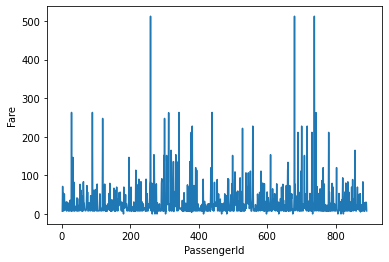

In [375]:
ax = sns.lineplot(x ='PassengerId',
                  y='Fare',
                  data=train_data)

In [376]:
train_data.loc[train_data['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [377]:
train_data.loc[train_data['Fare'] > 200].count()

PassengerId    20
Survived       20
Pclass         20
Name           20
Sex            20
Age            18
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin          17
Embarked       20
dtype: int64

In [378]:
def fare_tiers(fare):
    if fare > 400:
        return 1
    elif fare > 225:
        return 2
    elif fare > 120:
        return 3
    elif fare > 50:
        return 4
    else:
        return 5

train_data['Fare_Tier'] = train_data['Fare'].apply(fare_tiers)
test_data['Fare_Tier'] = test_data['Fare'].apply(fare_tiers)

In [379]:
corr_fare_surv, p = pearsonr(train_data.Fare, train_data.Survived)
print(corr_fare_surv)

0.25730652238496243


<AxesSubplot:xlabel='Fare_Tier', ylabel='Survived'>

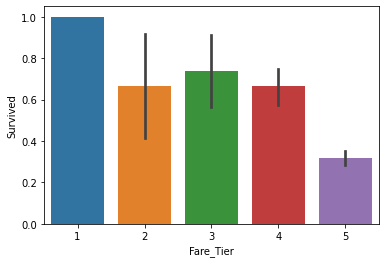

In [380]:
sns.barplot(x='Fare_Tier', y='Survived', data=train_data)

# Getting Titles (Mr, Mrs, Dr, Etc.)

In [381]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [382]:
train_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

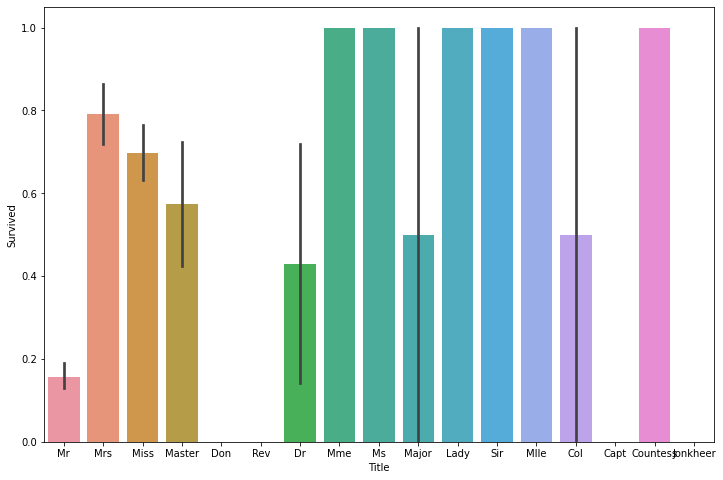

In [383]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Title', y='Survived', data=train_data)

In [384]:
train_data['Title'] = train_data['Title'].replace({"Mr":0,"Mrs":1,'Miss':2,'Master':3,'Don':4,'Rev':5,'Dr':5,'Mme':6,'Ms': 7,'Major': 8,
       'Lady':9, 'Sir':10, 'Mlle':11, 'Col':12, 'Capt':13, 'Countess':14, 'Jonkheer':15})

test_data['Title'] = train_data['Title'].replace({"Mr":0,"Mrs":1,'Miss':2,'Master':3,'Don':4,'Rev':5,'Dr':5,'Mme':6,'Ms': 7,'Major': 8,
       'Lady':9, 'Sir':10, 'Mlle':11, 'Col':12, 'Capt':13, 'Countess':14, 'Jonkheer':15})

In [385]:
train_data['Title'] = train_data['Title'].astype(int)
test_data['Title'] = train_data['Title'].astype(int)

In [386]:
age_mean = train_data[train_data['Age'] > 0]['Age'].mean()
train_data['Age'] = train_data['Age'].replace(0, age_mean)
train_data['Age'].fillna(age_mean, inplace=True)

sib_mean = train_data[train_data['SibSp'] > 0]['SibSp'].mean()
train_data['SibSp'] = train_data['SibSp'].replace(0, sib_mean)

test_data['Age'] = test_data['Age'].replace(0, age_mean)
test_data['Age'].fillna(age_mean, inplace=True)

test_data['SibSp'] = test_data['SibSp'].replace(0, sib_mean)

In [387]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Fare_Tier        0
Title            0
dtype: int64

In [388]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
